# Beam Strength Prediction

## Introduction
We have been provided with data about beam strength prediction. Beam strength is continous variable hence reregession problem will be considered. Data has been provided with 5 features for predicting beam strength with various CSV files with data about 5 features as data and file name of CSV as beam strength. We'll start with loading and preparing data. We'll then do exploratory data analysis to look at data distribution, relationship between various attributes of data and correlation of attributes with beam strength. Once exploratory data anaysis is done we'll try few ML models to check for performance of ML models on data. We'll then resort to Deep Learning models like Dense Net and Convolutional Neural Net for making better prediction about target variable.

Main technologies used for training ML models will be scikit-learn whereas main libraries used for deep learning models will be Keras. Matplotlib is primary used for data visualisation. Pandas dataframe data structure is used to maintain data.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import f_regression, f_classif, chi2
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, Convolution2D
from keras.optimizers import SGD, Adam, Adagrad, RMSprop
from keras import regularizers
from keras import initializers
from keras import losses
from keras.models import load_model
from keras.utils import plot_model

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from PIL import Image
#import hvplot.pandas

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
warnings.filterwarnings('ignore', category=FutureWarning)
np.set_printoptions(precision=3)
pd.set_option('precision', 3)
%matplotlib inline

Using TensorFlow backend.


/kaggle/input/dataset/60.csv
/kaggle/input/dataset/15.csv
/kaggle/input/dataset/35.csv
/kaggle/input/dataset/65.csv
/kaggle/input/dataset/1.csv
/kaggle/input/dataset/10.csv
/kaggle/input/dataset/70.csv
/kaggle/input/dataset/0.0001.csv
/kaggle/input/dataset/5.csv
/kaggle/input/dataset/17.5.csv
/kaggle/input/dataset/37.5.csv
/kaggle/input/dataset/32.5.csv
/kaggle/input/dataset/12.5.csv
/kaggle/input/dataset/45.csv
/kaggle/input/dataset/2.5.csv
/kaggle/input/dataset/25.csv
/kaggle/input/dataset/50.csv
/kaggle/input/dataset/30.csv
/kaggle/input/dataset/22.5.csv
/kaggle/input/dataset/27.5.csv
/kaggle/input/dataset/42.5.csv
/kaggle/input/dataset/20.csv
/kaggle/input/dataset/7.5.csv


## Data Loading & Cleaning

In [2]:
list_of_dfs = []
for file_name in os.listdir('/kaggle/input/dataset'):
    full_path_to_file = os.path.join('/kaggle/input/dataset', file_name)
    df = pd.read_csv(full_path_to_file, names= ['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5'])
    cls = float(file_name[:-4])
    df['Beam_Strength'] = cls
    list_of_dfs.append(df)

final_df = pd.concat(list_of_dfs)
print('Dataset Size Before Removing Rows with Any NA : ',final_df.shape)
final_df = final_df.dropna()
print('Dataset Size After Removing Rows with Any NA: ',final_df.shape)

X = final_df[['Attr1','Attr2','Attr3','Attr4','Attr5']].values
Y = final_df['Beam_Strength'].values

final_df.head()

Dataset Size Before Removing Rows with Any NA :  (230023, 6)
Dataset Size After Removing Rows with Any NA:  (230023, 6)


,Attr1,Attr2,Attr3,Attr4,Attr5,Beam_Strength
0,0.924,0.925,0.925,0.925,0.925,60.0
1,1.000,1.000,1.000,1.000,1.000,60.0
2,0.970,0.970,0.970,0.970,0.970,60.0
3,0.838,0.837,0.837,0.837,0.837,60.0
4,0.617,0.616,0.616,0.616,0.616,60.0


In [3]:
final_df.tail()

,Attr1,Attr2,Attr3,Attr4,Attr5,Beam_Strength
9996,0.551,0.492,0.528,0.512,0.501,7.5
9997,0.548,0.509,0.533,0.522,0.515,7.5
9998,0.493,0.477,0.487,0.482,0.479,7.5
9999,0.393,0.403,0.397,0.399,0.401,7.5
10000,0.262,0.297,0.275,0.285,0.292,7.5


## Exploratory Data Anlaysis

### Analysing Distribution of Individual Attributes

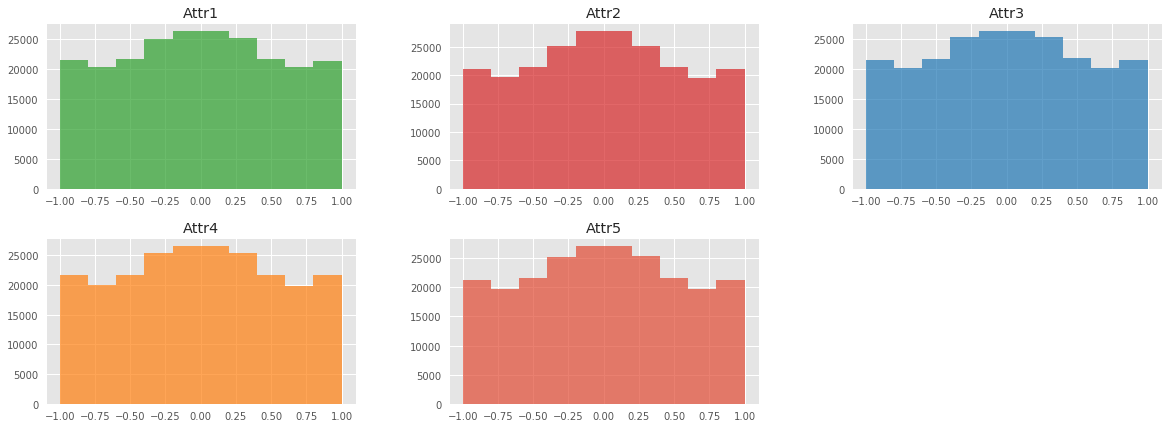

In [4]:
with plt.style.context(('seaborn', 'ggplot')):
    fig = plt.figure(figsize=(20,7))
    ax1 = fig.add_subplot(2,3,1)
    final_df[['Attr1']].hist(ax=ax1, color='tab:green', alpha=0.7)
    
    ax2 = fig.add_subplot(2,3,2)
    final_df[['Attr2']].hist(ax=ax2, color='tab:red', alpha=0.7)
    
    ax3 = fig.add_subplot(2,3,3)
    final_df[['Attr3']].hist(ax=ax3, color='tab:blue', alpha=0.7)
    
    ax4 = fig.add_subplot(2,3,4)
    final_df[['Attr4']].hist(ax=ax4, color='tab:orange', alpha=0.7)
    
    ax5 = fig.add_subplot(2,3,5)
    final_df[['Attr5']].hist(ax=ax5, alpha=0.7)

In [5]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
                 'limegreen', 'gold', 'firebrick', 'tomato', 'lawngreen', 'midnightblue', 'slategrey', 'forestgreen', 'darkgoldenrod', 'royalblue',
                 'palegreen', 'saddlebrown', 'orangered']

def plot_relationship_between_attrs(idx1=0, idx2=1):
    with plt.style.context(('seaborn', 'ggplot')):
        plt.figure(figsize = (12,6))
        plt.scatter(X[ :, idx1], X[ :, idx2], alpha=0.5, s=80)
        plt.xlabel(final_df.columns[idx1])
        plt.ylabel(final_df.columns[idx2])
        plt.title('Relationship between %s & %s'%(final_df.columns[idx1], final_df.columns[idx2]))

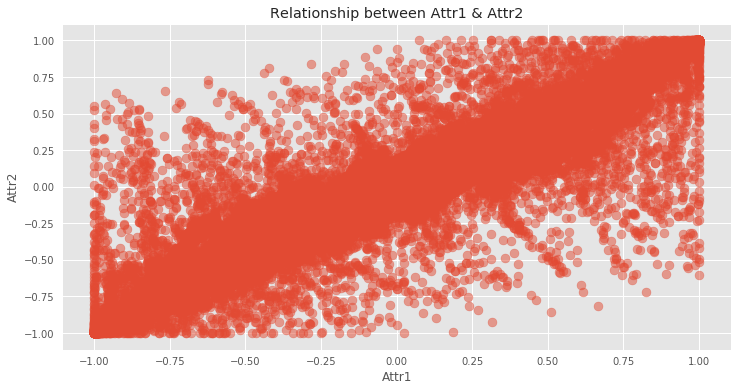

In [6]:
plot_relationship_between_attrs(0,1)

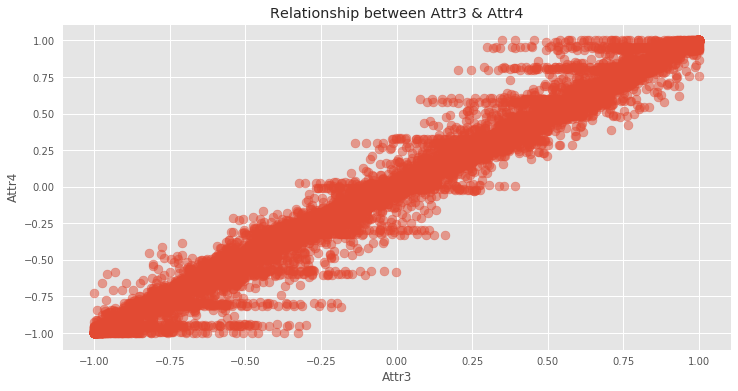

In [7]:
plot_relationship_between_attrs(2,3)

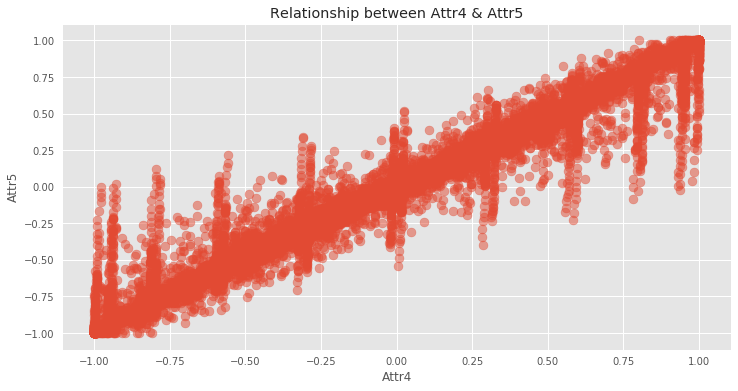

In [8]:
plot_relationship_between_attrs(3,4)

### Checking Correlationship between features and target variable

,Beam_Strength
Attr1,1.446e-05
Attr2,-3.863e-04
Attr3,-1.307e-04
Attr4,-1.801e-04
Attr5,-3.099e-04


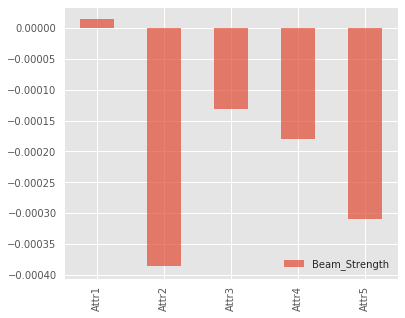

In [9]:
#final_df[['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5']].corr(final_df[['Beam_Strength']])
with plt.style.context(('seaborn', 'ggplot')):
    final_df.corr()[['Beam_Strength']].loc[['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5']].plot(kind='bar', figsize=(6,5), alpha=0.7)
    
final_df.corr()[['Beam_Strength']].loc[['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5']]

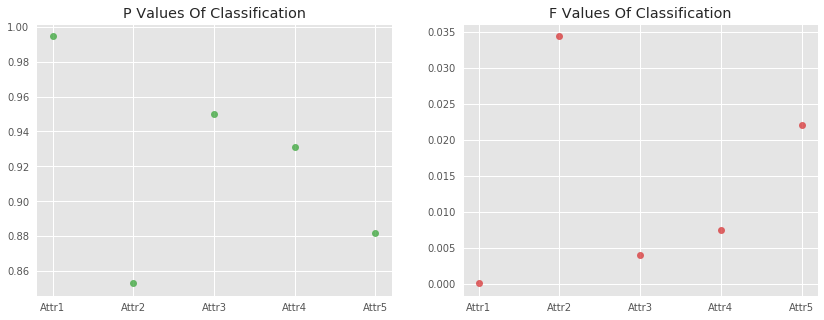

In [10]:
F_regression, p_value_regression = f_regression(X, Y)
with plt.style.context(('seaborn', 'ggplot')):
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    plt.plot(p_value_regression, 'o', c = 'tab:green', alpha=0.7)
    plt.xticks(range(5),['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5'])
    plt.title('P Values Of Classification')
    
    plt.subplot(122)
    plt.plot(F_regression, 'o', c = 'tab:red', alpha=0.7)
    plt.xticks(range(5),['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5'])
    plt.title('F Values Of Classification');

## Machine Learning Models

### Splitting Data into Train/Test Sets
Splitting data into train & test sets involve splitting of total data into train set and test set. We have decided to use 90% of data for training purpose and remaining 10% for test purpose. We have use scikit-learn function `train_test_split` to split total data into train/test sets. 

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9, test_size=0.1, stratify=Y, random_state=123)
print('Train/Test Sizes : ',X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (207020, 5) (23003, 5) (207020,) (23003,)


### Linear Regression

In [12]:
def fit_model_and_print_results(model):
    model.fit(X_train, Y_train)
    print('\n' , model.__class__.__name__)
    print('Train R^2 Score : %.2f'%model.score(X_train, Y_train))
    print('Test  R^2 Score : %.2f'%model.score(X_test, Y_test))

lr = LinearRegression()
fit_model_and_print_results(lr)



 LinearRegression
Train R^2 Score : 0.00
Test  R^2 Score : -0.00


### Random Forest

In [13]:
rf = RandomForestRegressor(n_estimators=300, n_jobs=-1)
fit_model_and_print_results(rf)



 RandomForestRegressor
Train R^2 Score : 0.96
Test  R^2 Score : 0.78


### Gradient Boosting

In [14]:
gb = GradientBoostingRegressor()
fit_model_and_print_results(gb)


 GradientBoostingRegressor
Train R^2 Score : 0.16
Test  R^2 Score : 0.16


In [15]:
#svc =  SVR()
#fit_model_and_print_results(svc)

## Deep Learning Models

### Dense Net

In [16]:
def dense_net(activation='relu', initializers='random_uniform', regularizer=None):
    model = Sequential([
        Dense(1024, activation=activation, 
              kernel_initializer=initializers, kernel_regularizer=regularizer, 
              bias_initializer=initializers, input_shape=(5,)),
        Dense(512, activation=activation, 
              kernel_initializer=initializers, kernel_regularizer=regularizer,
              bias_initializer=initializers, ),
        Dropout(0.5),
        Dense(256, activation=activation, 
              kernel_initializer=initializers, kernel_regularizer=regularizer,
              bias_initializer=initializers,),
        Dropout(0.5),
        Dense(128, activation=activation, 
              kernel_initializer=initializers, kernel_regularizer=regularizer,
              bias_initializer=initializers,),
        Dropout(0.5),
        Dense(64, activation=activation, 
              kernel_initializer=initializers, kernel_regularizer=regularizer,
              bias_initializer=initializers,),
        Dropout(0.5),
        Dense(10, activation=activation, 
              kernel_initializer=initializers, kernel_regularizer=regularizer,
              bias_initializer=initializers,
             ),
        Dense(1)
    ])
    return model

### Initializing Model

In [17]:
#he_unif = initializers.he_uniform(seed=123)
#glorot_unif = initializers.glorot_uniform(seed=123)
#lecun_unif = initializers.lecun_uniform(seed=123)
random_unif = initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=123)
regularization = regularizers.l1_l2(l1=0.001, l2=0.001)

model = dense_net(activation='relu', initializers=initializer, regularizer=regularization)

NameError: name 'initializer' is not defined

### Visualising Model

In [18]:
print(model.summary())
plot_model(model, show_shapes=True,to_file='model.png')
Image.open('model.png')

NameError: name 'model' is not defined

### Compiling Model

In [19]:
#model.compile(optimizer='rmsprop', loss='mse')
model.compile(optimizer='adam', loss='mse')

NameError: name 'model' is not defined

### Training Model

In [20]:
history = model.fit(X_train, Y_train, epochs=60, batch_size=1024, validation_split=0.2, use_multiprocessing=True, verbose=1)
#print(history.history)

NameError: name 'model' is not defined

### Testing Model

In [21]:
test_preds = model.predict(X_test)
train_preds = model.predict(X_train)
print('Train R^2 Score : %.2f'%r2_score(Y_train, train_preds))
print('Test  R^2 Score : %.2f'%r2_score(Y_test, test_preds))

NameError: name 'model' is not defined

### Saving Model & Loading from Saved File

In [22]:
model.save('dense_net.h5')
model = load_model('dense_net.h5')

NameError: name 'model' is not defined

In [23]:
## 20 epoch, 1024 batch size and Adam = 0.57 R2score
## 20 epoch, 1024 batch size and Rmsprop = 0.34 R2score
## 20 epoch, 1024 batch size and Adam = 0.51 R2score (Random Normal Initializers)
## 30 epoch, 1024 batch size and Adam = 0.67 R2score (Random Normal Initializers)
## 50 epoch, 1024 batch size and Adam = 0.74 R2score (Random Normal Initializers)
## 70 epoch, 1024 batch size and Adam = 0.55 R2score (Random Normal Initializers, Kernel & Bias Regularizers)
## 70 epoch, 1024 batch size and Adam = 0.62 R2score (Random Normal Initializers, Kernel Regularizers)
